Number of points: 156
First 5 points:
[[-0.1475   -0.1475   -0.876884]
 [-0.1475   -0.161837 -0.845   ]
 [-0.176174 -0.1475   -0.845   ]
 [-0.1475   -0.164438 -0.7675  ]
 [-0.181376 -0.1475   -0.7675  ]]


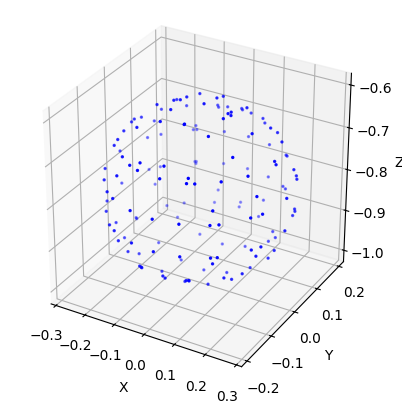

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .dat file (which is actually a .npz file)
dat_path = './iccv_p2mpp.dat'  # Change to your actual path if needed

data = np.load(dat_path, allow_pickle=True)
points = data['coord']  # (N, 3)
# Optionally, you can also get faces and normals if present:
# faces = data['faces']
# normals = data['normals']

print(f'Number of points: {points.shape[0]}')
print('First 5 points:')
print(points[:5])

# Plot the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=2, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])
plt.show()

In [11]:
import numpy as np

dat_path = './iccv_p2mpp.dat'
data = np.load(dat_path, allow_pickle=True)
print("Available keys:", data.keys())

# Try common keys
for key in ['points', 'vertices', 'coord']:
    if key in data:
        print(f"First 5 points from '{key}':\n", data[key][:5])

Available keys: dict_keys(['coord', 'stage1', 'stage2', 'stage3', 'pool_idx', 'faces', 'lape_idx', 'sample_coord', 'sample_cheb', 'sample_cheb_dense', 'sample_cheb_block_adj', 'faces_triangle'])
First 5 points from 'coord':
 [[-0.1475   -0.1475   -0.876884]
 [-0.1475   -0.161837 -0.845   ]
 [-0.176174 -0.1475   -0.845   ]
 [-0.1475   -0.164438 -0.7675  ]
 [-0.181376 -0.1475   -0.7675  ]]


In [21]:
import numpy as np

# Generate your flat template
num_points = 1000
radius = 1.0
z_height = 0.05
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points)) * radius
x = radii * np.cos(angles)
y = radii * np.sin(angles)
z = np.random.uniform(-z_height, z_height, num_points)
flat_points = np.stack([x, y, z], axis=1)

# Load original data
dat_path = './iccv_p2mpp.dat'
data = np.load(dat_path, allow_pickle=True)

# Prepare new data dict, converting all values to arrays (object if needed)
new_data = {}
for k in data.keys():
    v = data[k]
    try:
        arr = np.array(v)
        new_data[k] = arr
    except Exception:
        new_data[k] = np.array(v, dtype=object)
# Overwrite 'coord' with your flat template
new_data['coord'] = flat_points

np.savez('./iccv_p2mpp_custom_flat.dat', **new_data, allow_pickle=True)
print("Saved new flat template as iccv_p2mpp_custom_flat.dat")

Saved new flat template as iccv_p2mpp_custom_flat.dat


In [43]:
import numpy as np

# Generate 156 points on a (very flat) sphere
num_points = 156
phi = np.arccos(1 - 2 * (np.arange(1, num_points + 1) / (num_points + 1)))
theta = np.pi * (1 + 5**0.5) * np.arange(1, num_points + 1)
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z_scale = 0.00  # perfectly flat
z = np.cos(phi) * z_scale
points = np.stack([x, y, z], axis=1)

# Load original data
dat_path = './iccv_p2mpp.dat'
data = np.load(dat_path, allow_pickle=True)

# Prepare new data dict, converting all values to arrays (object if needed)
new_data = {}
for k in data.keys():
    v = data[k]
    try:
        arr = np.array(v)
        new_data[k] = arr
    except Exception:
        new_data[k] = np.array(v, dtype=object)
# Overwrite 'coord' with your new points
new_data['coord'] = points

np.savez('./iccv_p2mpp_custom_flat_156.dat', **new_data, allow_pickle=True)
print("Saved new, much flatter template as iccv_p2mpp_custom_flat_156.dat")

Saved new, much flatter template as iccv_p2mpp_custom_flat_156.dat


Number of points: 156
First 5 points:
[[-0.11732146 -0.10747606  0.        ]
 [ 0.01960877  0.22343186  0.        ]
 [ 0.16659742 -0.21729684  0.        ]
 [-0.31032441  0.05489202  0.        ]
 [ 0.29631501  0.18849135  0.        ]]


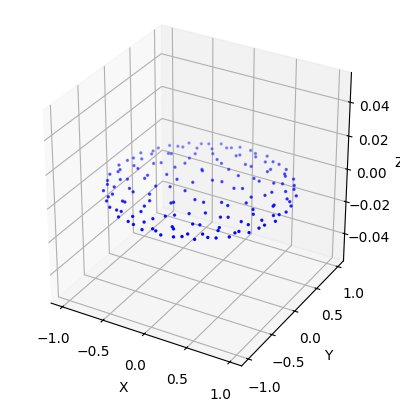

In [42]:
import numpy as np
import matplotlib.pyplot as plt

dat_path = './iccv_p2mpp_custom_flat_156.dat.npz'
data = np.load(dat_path, allow_pickle=True)
points = data['coord']

print(f'Number of points: {points.shape[0]}')
print('First 5 points:')
print(points[:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=2, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])
plt.show()